<a href="https://colab.research.google.com/github/DanielGongora28/HR_ADA_G2/blob/main/AvanceRRHH%20(15/02)LUDENS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importación de librerias

In [43]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions
import joblib

# Ingesta, preparacion y Limpieza Inicial de datos.

## general_data.csv

In [24]:
empleados=pd.read_csv(r'D:\Users\USUARIO\Desktop\Analitica III\general_data.csv',sep=';')

In [ ]:
for i in empleados.columns:
    print(i,empleados[i].isnull().value_counts())

In [ ]:
#CAD 1
toReplace=['NumCompaniesWorked','TotalWorkingYears']
for i in toReplace:
    empleados[i].replace(np.nan,0,inplace=True)

for i in empleados.columns:
    print(i,empleados[i].isnull().value_counts())
    

## employee_survey_data.csv

In [22]:
satisfaccion=pd.read_csv(r'C:\Users\PC\Desktop\Analitica 3\employee_survey_data.csv')

In [ ]:
for i in satisfaccion.columns:
    print(i,satisfaccion[i].isnull().value_counts())

In [ ]:
satisfaccion[satisfaccion['WorkLifeBalance'].isnull()]

In [ ]:
satisfaccion[satisfaccion['EnvironmentSatisfaction'].isnull()]

In [ ]:
satisfaccion[satisfaccion['JobSatisfaction'].isnull()]

In [23]:
#CAD 2
mediaES=satisfaccion['EnvironmentSatisfaction'][satisfaccion['EnvironmentSatisfaction'].notnull()].mean().__round__(2)
mediaJS=satisfaccion['JobSatisfaction'][satisfaccion['JobSatisfaction'].notnull()].mean().__round__(2)
mediaWLB=satisfaccion['WorkLifeBalance'][satisfaccion['WorkLifeBalance'].notnull()].mean().__round__(2)
medias=[mediaES,mediaJS,mediaWLB]
for i,j in zip(satisfaccion.columns[1:],medias):
    satisfaccion[i].replace(np.nan,j,inplace=True)


In [ ]:
for i in satisfaccion.columns:
    print(i,satisfaccion[i].isnull().value_counts())

## retirement_info.csv

In [33]:
retiros=pd.read_csv(r'C:\Users\PC\Desktop\Analitica 3\retirement_info.csv',sep=';')

In [ ]:
for i in retiros.columns:
    print(i,retiros[i].isnull().value_counts())

In [34]:
#CAD 3
retiros['resignationReason'].replace(np.nan,'NR',inplace=True)

## manager_survey_data.csv

In [25]:
managers=pd.read_csv(r'C:\Users\PC\Desktop\Analitica 3\manager_survey_data.csv')

In [ ]:
for i in managers.columns:
    print(i,managers[i].isnull().value_counts())

## In n Out Times

In [ ]:
in_time=pd.read_csv(r'C:\Users\PC\Desktop\Analitica 3\in_time.csv')
in_time

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,NaN,2015-01-02 09:20:32,2015-01-05 10:17:53,2015-01-06 10:26:51,2015-01-07 10:06:58,2015-01-08 09:45:06,2015-01-09 09:49:24,2015-01-12 09:37:10,2015-01-13 09:25:02,...,2015-12-18 10:01:06,2015-12-21 10:25:25,2015-12-22 10:16:11,2015-12-23 10:04:40,2015-12-24 09:45:40,NaN,2015-12-28 10:15:39,2015-12-29 10:10:09,2015-12-30 09:28:19,2015-12-31 10:00:12
4406,4407,NaN,2015-01-02 10:03:41,NaN,2015-01-06 09:44:00,2015-01-07 09:42:10,2015-01-08 10:00:57,2015-01-09 09:44:04,2015-01-12 10:07:32,2015-01-13 10:05:11,...,2015-12-18 09:27:32,2015-12-21 09:41:24,2015-12-22 09:50:30,2015-12-23 10:32:21,2015-12-24 09:47:41,NaN,2015-12-28 09:54:23,2015-12-29 10:13:32,2015-12-30 10:21:09,2015-12-31 10:09:48
4407,4408,NaN,2015-01-02 10:01:01,2015-01-05 09:33:00,2015-01-06 09:49:17,2015-01-07 10:28:12,2015-01-08 09:47:38,2015-01-09 10:01:03,2015-01-12 09:49:12,2015-01-13 09:47:10,...,2015-12-18 10:00:57,2015-12-21 09:51:07,2015-12-22 10:02:10,2015-12-23 09:58:29,2015-12-24 09:56:05,NaN,2015-12-28 09:59:24,NaN,2015-12-30 10:02:36,2015-12-31 10:03:30
4408,4409,NaN,2015-01-02 10:17:05,2015-01-05 10:02:27,2015-01-06 10:12:50,2015-01-07 10:12:31,2015-01-08 09:42:57,NaN,2015-01-12 10:00:38,2015-01-13 09:48:03,...,2015-12-18 09:54:33,2015-12-21 10:01:08,2015-12-22 10:10:19,2015-12-23 09:42:30,2015-12-24 09:56:05,NaN,2015-12-28 09:55:25,2015-12-29 09:54:42,2015-12-30 10:15:44,2015-12-31 09:56:47


In [ ]:
out_time=pd.read_csv(r'C:\Users\PC\Desktop\Analitica 3\out_time.csv')
out_time

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,NaN,2015-01-02 17:27:37,2015-01-05 19:08:20,2015-01-06 18:50:49,2015-01-07 18:57:40,2015-01-08 17:58:31,2015-01-09 18:06:15,2015-01-12 17:58:48,2015-01-13 18:10:35,...,2015-12-18 18:06:05,2015-12-21 18:35:06,2015-12-22 18:33:44,2015-12-23 18:40:56,2015-12-24 18:21:29,NaN,2015-12-28 18:44:35,2015-12-29 19:14:38,2015-12-30 18:24:56,2015-12-31 18:30:41
4406,4407,NaN,2015-01-02 16:19:01,NaN,2015-01-06 15:07:37,2015-01-07 15:25:50,2015-01-08 16:12:33,2015-01-09 15:26:56,2015-01-12 16:10:42,2015-01-13 16:22:43,...,2015-12-18 15:23:02,2015-12-21 15:31:14,2015-12-22 15:45:59,2015-12-23 16:38:59,2015-12-24 15:47:15,NaN,2015-12-28 15:34:34,2015-12-29 16:47:02,2015-12-30 16:03:17,2015-12-31 16:18:39
4407,4408,NaN,2015-01-02 17:17:35,2015-01-05 17:08:07,2015-01-06 17:27:46,2015-01-07 18:27:22,2015-01-08 17:05:25,2015-01-09 17:02:57,2015-01-12 17:35:45,2015-01-13 17:15:52,...,2015-12-18 17:48:05,2015-12-21 17:43:05,2015-12-22 17:47:23,2015-12-23 17:43:37,2015-12-24 17:20:12,NaN,2015-12-28 17:43:28,NaN,2015-12-30 17:48:14,2015-12-31 18:08:55
4408,4409,NaN,2015-01-02 19:48:37,2015-01-05 19:37:40,2015-01-06 20:00:08,2015-01-07 19:35:59,2015-01-08 18:55:13,NaN,2015-01-12 19:18:17,2015-01-13 19:24:02,...,2015-12-18 19:52:44,2015-12-21 19:21:35,2015-12-22 19:32:40,2015-12-23 18:57:00,2015-12-24 19:37:57,NaN,2015-12-28 19:58:36,2015-12-29 18:55:26,2015-12-30 19:37:22,2015-12-31 19:33:45


# Creacion de df 'final'

In [91]:
# Se decide elaborar un dataframe final en función del "EmployeeID" 

df_1= pd.merge(empleados,satisfaccion,on="EmployeeID",how="inner")
df=pd.merge(df_1,managers,on="EmployeeID",how="inner")
df

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,...,1.0,6,1,0,0,3.0,4.0,2.00,3,3
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,...,6.0,3,5,1,4,3.0,2.0,4.00,2,4
2,32,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,...,5.0,2,5,0,3,2.0,2.0,1.00,3,3
3,38,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,...,13.0,5,8,7,5,4.0,4.0,3.00,2,3
4,32,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,...,9.0,2,6,0,4,4.0,1.0,3.00,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,...,10.0,5,3,0,2,4.0,1.0,3.00,3,3
4406,29,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,...,10.0,2,3,0,2,4.0,4.0,3.00,2,3
4407,25,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,...,5.0,4,4,1,2,1.0,3.0,3.00,3,4
4408,42,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,...,10.0,2,9,7,8,4.0,1.0,3.00,2,3


In [92]:
borrar=['EmployeeCount','Over18','StandardHours'] #Columnas no significativas
retirados=retiros.EmployeeID #IDs de los retirados
df['retirado']=df['EmployeeID'].apply(lambda x: 1 if x in retirados.values else 0) #Columna Binaria a modo de var. objetivo
df.drop(columns=borrar,inplace=True) #Borrar las no significativas
df['SalaryHike']=df.PercentSalaryHike.apply(lambda x:x/100) #Reajustando SalaryHike
df.drop(columns=['PercentSalaryHike'],inplace=True) #Borrando antigua columna

In [95]:
df.to_csv(r'C:\Users\PC\Desktop\Analitica 3\dfFinalRRHH.csv')

# Analisis Exploratorio


In [ ]:
df=pd.read_csv(r'C:\Users\PC\Desktop\Analitica 3\Code\dfFinalRRHH.csv')

In [37]:
df.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeID', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating', 'retirado', 'SalaryHike'],
      dtype='object')

In [40]:
df_retirados = df[df['retirado'] == 1] #Creamos un df de retirados y 'no retirados' completos para graficar informacion
df_no_retirados=df[df['retirado'] == 0]

In [44]:
#Grafica de compraracion de edad de las personas que se van y se quedan.
import plotly.express as px
fig = px.histogram(df, x="Age", color="retirado")
fig.show()

In [104]:
#Comparativo de la satisfaccion laboral de las personas que se retiran y las que no.

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import plotly.express as px

dic1=df_retirados['JobSatisfaction'].value_counts().to_dict()
dic2=df_no_retirados['JobSatisfaction'].value_counts().to_dict()

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=list(dic1.keys()), values=list(dic1.values()), name="Retirados"),
              1, 1)
fig.add_trace(go.Pie(labels=list(dic2.keys()), values=list(dic2.values()), name="No Retirados"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Job Satisfaction",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='R', x=0.22, y=0.5, font_size=20, showarrow=False),
                 dict(text='NR', x=0.8, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [81]:
#Comparativo del nivel educativo entre retirados y no retirados

dic1=df_retirados['Education'].value_counts().to_dict()
dic2=df_no_retirados['Education'].value_counts().to_dict()

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=list(dic1.keys()), values=list(dic1.values()), name="Retirados"),
              1, 1)
fig.add_trace(go.Pie(labels=list(dic2.keys()), values=list(dic2.values()), name="No Retirados"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Education",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='R', x=0.22, y=0.5, font_size=20, showarrow=False),
                 dict(text='NR', x=0.8, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [83]:
#Comparacion del nivel de percepcion del ambiente laboral

dic1=df_retirados['EnvironmentSatisfaction'].value_counts().to_dict()
dic2=df_no_retirados['EnvironmentSatisfaction'].value_counts().to_dict()

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=list(dic1.keys()), values=list(dic1.values()), name="Retirados"),
              1, 1)
fig.add_trace(go.Pie(labels=list(dic2.keys()), values=list(dic2.values()), name="No Retirados"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="EnvironmentSatisfaction",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='R', x=0.22, y=0.5, font_size=20, showarrow=False),
                 dict(text='NR', x=0.8, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [107]:
#Queremos ver como afecta el Income Mensual en el aumento del salario, y la diferencia entre esta afección entre las personas retiradas y no retiradas

fig = px.scatter(df_retirados, x="SalaryHike", y="MonthlyIncome", color="Department",
                 hover_name="EmployeeID", log_x=True, size_max=60)
fig.show()

In [109]:
fig = px.scatter(df_no_retirados, x="SalaryHike", y="MonthlyIncome", color="Department",
                 hover_name="EmployeeID", log_x=True, size_max=60)
fig.show()

In [97]:
#Buscando no crear tantas graficas, se pueden relacionar 4 variables, en una sola.
fig = px.scatter(df_retirados, x="NumCompaniesWorked", y="MonthlyIncome",
	         size="Age", color="Gender",
                 hover_name="EmployeeID", log_x=True, size_max=60)
fig.show()

In [110]:
dic1=df_retirados['Gender'].value_counts().to_dict()
dic2=df_no_retirados['Gender'].value_counts().to_dict()

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=list(dic1.keys()), values=list(dic1.values()), name="Retirados"),
              1, 1)
fig.add_trace(go.Pie(labels=list(dic2.keys()), values=list(dic2.values()), name="No Retirados"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Gender",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='R', x=0.22, y=0.5, font_size=20, showarrow=False),
                 dict(text='NR', x=0.8, y=0.5, font_size=20, showarrow=False)])
fig.show()

# Creacion de un df para predecir


In [15]:
#Leer en portatil
df=pd.read_csv(r'D:\Users\USUARIO\Desktop\Analitica3\Modelo_final\dfPredictivoRRHH1.csv')

In [16]:
df

,Unnamed: 0,EmployeeID,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_1,Education_2,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,retirado,SalaryHike
0,0,1,0,0,1,0,0,1,0,1,...,1,0,0,3.0,4.0,2.00,3,3,0,0.11
1,1,2,0,1,0,0,1,0,1,0,...,5,1,4,3.0,2.0,4.00,2,4,1,0.23
2,2,3,0,1,0,0,1,0,0,0,...,5,0,3,2.0,2.0,1.00,3,3,0,0.15
3,3,4,1,0,0,0,1,0,0,0,...,8,7,5,4.0,4.0,3.00,2,3,0,0.11
4,4,5,0,0,1,0,1,0,1,0,...,6,0,4,4.0,1.0,3.00,3,3,0,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4405,4406,0,0,1,0,1,0,0,0,...,3,0,2,4.0,1.0,3.00,3,3,0,0.17
4406,4406,4407,0,0,1,0,1,0,0,0,...,3,0,2,4.0,4.0,3.00,2,3,0,0.15
4407,4407,4408,0,0,1,0,1,0,0,1,...,4,1,2,1.0,3.0,3.00,3,4,0,0.20
4408,4408,4409,0,0,1,0,0,1,0,1,...,9,7,8,4.0,1.0,3.00,2,3,0,0.14


In [17]:
# Identificar las columnas a 'dummificar'
for i in df.columns:
    print(i)
    print(df[i].unique())


Unnamed: 0
[   0    1    2 ... 4407 4408 4409]
EmployeeID
[   1    2    3 ... 4408 4409 4410]
BusinessTravel_Non-Travel
[0 1]
BusinessTravel_Travel_Frequently
[0 1]
BusinessTravel_Travel_Rarely
[1 0]
Department_Human Resources
[0 1]
Department_Research & Development
[0 1]
Department_Sales
[1 0]
Education_1
[0 1]
Education_2
[1 0]
Education_3
[0 1]
Education_4
[0 1]
Education_5
[0 1]
EducationField_Human Resources
[0 1]
EducationField_Life Sciences
[1 0]
EducationField_Marketing
[0 1]
EducationField_Medical
[0 1]
EducationField_Other
[0 1]
EducationField_Technical Degree
[0 1]
Gender_Female
[1 0]
Gender_Male
[0 1]
JobRole_Healthcare Representative
[1 0]
JobRole_Human Resources
[0 1]
JobRole_Laboratory Technician
[0 1]
JobRole_Manager
[0 1]
JobRole_Manufacturing Director
[0 1]
JobRole_Research Director
[0 1]
JobRole_Research Scientist
[0 1]
JobRole_Sales Executive
[0 1]
JobRole_Sales Representative
[0 1]
MaritalStatus_Divorced
[0 1]
MaritalStatus_Married
[1 0]
MaritalStatus_Single
[0 1]


In [27]:
toDummis=['BusinessTravel','Department',
          'Education','EducationField',
          'Gender','JobRole','MaritalStatus','EmployeeID']
toDrop=['BusinessTravel','Department',
          'Education','EducationField',
          'Gender','JobRole','MaritalStatus']

In [ ]:
d=df[toDummis]

In [ ]:
d['Education']=d.Education.astype(str)

In [45]:
dfDummis=pd.get_dummies(d,drop_first=True)

In [46]:
df_nDummis=df.copy()

In [ ]:
df_nDummis.drop(columns=toDrop,inplace=True)
dffinal=pd.merge(dfDummis,df_nDummis,on='EmployeeID',how='inner')
dffinal

In [ ]:
dffinal.to_csv(r'D:\Users\USUARIO\Desktop\Analitica3\Modelo_final\dfPredictivoRRHH1.csv')

# Modelos Iniciales

## Preparacion

In [3]:
#Leer en PC
dfpred=pd.read_csv(r'C:\Users\PC\Desktop\Analitica 3\Code\dfPredictivoRRHH.csv')

In [4]:
# Variables de entrada del modelo para las predicciones
toPred=['BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'Education_1', 'Education_2', 'Education_3',
       'Education_4', 'Education_5', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Age',
       'DistanceFromHome', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating','SalaryHike']
X=dfpred[toPred]
y=dfpred['retirado']

In [5]:
# Se separan los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [6]:
y_test.value_counts()

0    935
1    168
Name: retirado, dtype: int64

## Logistic Reg

In [41]:
LogReg = LogisticRegression(random_state=0).fit(X_train, y_train)
PredLogReg= LogReg.predict(X_test)

In [42]:
accuracy_score(y_test, PredLogReg)

0.8476881233000907

In [44]:
cm = pd.DataFrame(
    confusion_matrix(y_test, PredLogReg,labels=[0,1]), 
    index=['Real:{:}'.format(x) for x in [0,1]], 
    columns=['Pred:{:}'.format(x) for x in [0,1]]
)
cm

,Pred:0,Pred:1
Real:0,935,0
Real:1,168,0


In [45]:
print(classification_report(y_test,PredLogReg))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       935
           1       0.00      0.00      0.00       168

    accuracy                           0.85      1103
   macro avg       0.42      0.50      0.46      1103
weighted avg       0.72      0.85      0.78      1103



c:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree


In [7]:
td=tree.DecisionTreeClassifier()
td=td.fit(X_train, y_train)
tdpre=td.predict(X_test)

In [8]:
accuracy_score(y_test,tdpre)

0.986400725294651

In [9]:
cm = pd.DataFrame(
    confusion_matrix(y_test, tdpre,labels=[0,1]), 
    index=['Real:{:}'.format(x) for x in [0,1]], 
    columns=['Pred:{:}'.format(x) for x in [0,1]]
)
cm

,Pred:0,Pred:1
Real:0,928,7
Real:1,8,160


In [10]:
print(classification_report(y_test,tdpre))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       935
           1       0.96      0.95      0.96       168

    accuracy                           0.99      1103
   macro avg       0.97      0.97      0.97      1103
weighted avg       0.99      0.99      0.99      1103



[Text(103.81965465409739, 211.4, 'X[37] <= 1.5\ngini = 0.274\nsamples = 3307\nvalue = [2764, 543]'),
 Text(22.266983372921615, 199.32, 'X[30] <= 0.5\ngini = 0.5\nsamples = 223\nvalue = [112, 111]'),
 Text(14.314489311163896, 187.24, 'X[43] <= 2.5\ngini = 0.434\nsamples = 113\nvalue = [77, 36]'),
 Text(7.9524940617577204, 175.16, 'X[33] <= 3.5\ngini = 0.499\nsamples = 55\nvalue = [26, 29]'),
 Text(6.361995249406176, 163.07999999999998, 'X[34] <= 38495.0\ngini = 0.483\nsamples = 44\nvalue = [26, 18]'),
 Text(3.180997624703088, 151.0, 'X[42] <= 3.5\ngini = 0.36\nsamples = 17\nvalue = [4, 13]'),
 Text(1.590498812351544, 138.92000000000002, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(4.771496437054632, 138.92000000000002, 'X[32] <= 17.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(3.180997624703088, 126.84, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(6.361995249406176, 126.84, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(9.542992874109263, 151.0, 'X[1] <= 0.5\ngini

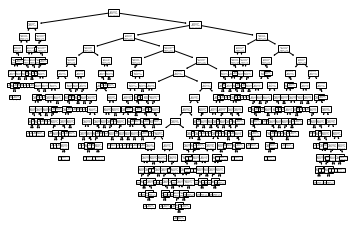

In [11]:
tree.plot_tree(td)

## Gaussian NB

In [28]:
GNB = GaussianNB().fit(X_train, y_train)
PredNB= GNB.predict(X_test)

In [29]:
accuracy_score(y_test, PredNB)

0.8404351767905711

In [30]:
cm = pd.DataFrame(
    confusion_matrix(y_test, PredNB,labels=[0,1]), 
    index=['Real:{:}'.format(x) for x in [0,1]], 
    columns=['Pred:{:}'.format(x) for x in [0,1]]
)
cm

,Pred:0,Pred:1
Real:0,891,44
Real:1,132,36


In [33]:
print(classification_report(y_test,PredNB))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       935
           1       0.45      0.21      0.29       168

    accuracy                           0.84      1103
   macro avg       0.66      0.58      0.60      1103
weighted avg       0.81      0.84      0.82      1103



## LinearSVC

In [19]:
SVC = make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5,class_weight='balanced',max_iter=40000)).fit(X_train, y_train)
SVCpred=SVC.predict(X_test)


In [20]:
accuracy_score(y_test, SVCpred)

0.6872166817769719

In [25]:
confusion_matrix(y_test, SVCpred,labels=[0,1])

array([[647, 288],
       [ 57, 111]], dtype=int64)

In [21]:
cm = pd.DataFrame(
    confusion_matrix(y_test, SVCpred,labels=[0,1]), 
    index=['Real:{:}'.format(x) for x in [0,1]], 
    columns=['Pred:{:}'.format(x) for x in [0,1]]
)
cm

,Pred:0,Pred:1
Real:0,647,288
Real:1,57,111


In [21]:
print(classification_report(y_test,SVCpred))

              precision    recall  f1-score   support

           0       0.92      0.69      0.79       935
           1       0.28      0.66      0.39       168

    accuracy                           0.69      1103
   macro avg       0.60      0.68      0.59      1103
weighted avg       0.82      0.69      0.73      1103



## NNs

In [35]:
NN = MLPClassifier(random_state=1, max_iter=300,solver='adam').fit(X_train, y_train)
PredNN=NN.predict(X_test)

In [36]:
accuracy_score(y_test,PredNN)

0.8476881233000907

In [37]:
cm = pd.DataFrame(
    confusion_matrix(y_test, PredNN,labels=[0,1]), 
    index=['Real:{:}'.format(x) for x in [0,1]], 
    columns=['Pred:{:}'.format(x) for x in [0,1]]
)
cm

,Pred:0,Pred:1
Real:0,935,0
Real:1,168,0


In [26]:
print(classification_report(y_test,PredNN))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       935
           1       0.00      0.00      0.00       168

    accuracy                           0.85      1103
   macro avg       0.42      0.50      0.46      1103
weighted avg       0.72      0.85      0.78      1103



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5

# Ajuste de hiperparametros

## Logistic Regression

Se decidio optar por el modelo de Decision Tree dado sus rendimientos.


## Decision Tree

Para el decision tree optamos por usar tecnicas para prevenir el sobreajuste y afinar los hiperparametros.

### Ajuste de parametros

In [12]:
td.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [17]:
param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [2,3,5]
}

In [23]:

grid_cv = GridSearchCV(td, param_grid, scoring="roc_auc", n_jobs=-1, cv=5).fit(X_train, y_train)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", roc_auc_score(y_train, grid_cv.predict(X_train)))
print("Test AUC ROC Score for GS: ", roc_auc_score(y_test, grid_cv.predict(X_test)))


Param for GS {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5}
CV score for GS 0.9285424049550949
Train AUC ROC Score for GS:  0.9747926511075042
Test AUC ROC Score for GS:  0.8740705373058315


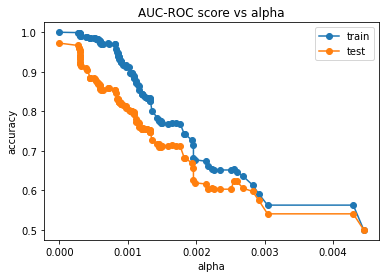

In [20]:


# compute ccp_alpha values
path = td.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# train DT classifier for each ccp_alpha value
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Plot train and test score for each of the above trained model
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

train_scores = [roc_auc_score(y_train, td2.predict(X_train)) for td2 in clfs]
test_scores = [roc_auc_score(y_test, td2.predict(X_test)) for td2 in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("AUC-ROC score vs alpha")
ax.plot(ccp_alphas, train_scores, marker='o', label="train")
ax.plot(ccp_alphas, test_scores, marker='o', label="test")
ax.legend()
plt.show()

### Modelo con hiperparametros ajustados

In [25]:
dt=tree.DecisionTreeClassifier(max_depth= 15, min_samples_leaf= 2, min_samples_split= 5).fit(X_train,y_train)
dtpred=dt.predict(X_test)

In [26]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
score='accuracy'
resultado = cross_val_score(dt, X_train, y_train, cv=kfold, scoring=score,error_score='raise')
resultado2 = cross_val_score(dt, X_test, y_test, cv=kfold, scoring=score,error_score='raise')
print('Accuracy for train= ',resultado.mean()*100)
print('Accuracy for test= ',resultado2.mean()*100)

Accuracy for train=  92.83255515883914
Accuracy for test=  86.67158067158066


In [27]:
cm = pd.DataFrame(
    confusion_matrix(y_test, dtpred,labels=[0,1]), 
    index=['Real:{:}'.format(x) for x in [0,1]], 
    columns=['Pred:{:}'.format(x) for x in [0,1]]
)
cm

,Pred:0,Pred:1
Real:0,920,15
Real:1,38,130


In [29]:
print(classification_report(dtpred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       958
           1       0.77      0.90      0.83       145

    accuracy                           0.95      1103
   macro avg       0.88      0.93      0.90      1103
weighted avg       0.96      0.95      0.95      1103



# Feature Selection

## Selection

In [51]:
len(X_train.columns)

48

In [30]:
#crear un modelo de selección
est_prueba = SelectKBest(score_func=f_classif, k=3)
est_ajustado = est_prueba.fit(X_train, y_train)

#Se muestran el desempeño de los features basado en el valor F
set_printoptions(precision=3)
print(est_ajustado.scores_)
features = est_ajustado.transform(X)
print(features)

[2.174e+01 3.129e+01 2.788e+00 1.518e+01 7.603e-02 1.976e+00 9.924e-01
 3.919e+00 2.470e-03 4.979e-01 4.643e-01 1.479e+01 5.208e-01 2.490e-02
 2.499e-02 1.678e+00 5.772e+00 7.549e-01 7.549e-01 1.048e-02 1.570e+00
 8.014e-03 6.755e-01 6.784e+00 1.363e+01 3.958e+00 6.141e-02 1.251e+00
 2.580e+01 2.820e+01 1.075e+02 9.944e+01 7.848e-01 1.269e+00 2.965e+00
 4.143e+00 9.960e-02 1.103e+02 1.074e+01 7.295e+01 5.830e+00 9.377e+01
 4.104e+01 5.358e+01 1.177e+01 5.184e-01 2.180e-01 1.451e+00]
[[ 0. 51.  1.]
 [ 1. 31.  6.]
 [ 0. 32.  5.]
 ...
 [ 0. 25.  5.]
 [ 0. 42. 10.]
 [ 0. 40.  0.]]


In [31]:
d1={'features':X_train.columns,'score':est_ajustado.scores_}
fs=pd.DataFrame(d1)


In [32]:
fs.sort_values(by=['score'],ascending=False,inplace=True)

In [33]:
selected_features=fs[fs['score'] > 10]['features'].values

In [34]:
selected_features

array(['TotalWorkingYears', 'MaritalStatus_Single', 'Age',
       'YearsWithCurrManager', 'YearsAtCompany', 'JobSatisfaction',
       'EnvironmentSatisfaction', 'BusinessTravel_Travel_Frequently',
       'MaritalStatus_Married', 'MaritalStatus_Divorced',
       'BusinessTravel_Non-Travel', 'Department_Human Resources',
       'EducationField_Human Resources', 'JobRole_Research Director',
       'WorkLifeBalance', 'TrainingTimesLastYear'], dtype=object)

## Modelo con las features seleccionados

In [35]:
# Filtramos los dataframe en función de los features seleccionados y volvemos a generar el modelo
X_final=X_train[selected_features]
X_pred=X_test[selected_features]

In [38]:
#Se establece el modelo final 
dt2=tree.DecisionTreeClassifier(max_depth= 15, min_samples_leaf= 2, min_samples_split= 5).fit(X_final,y_train)
dt2pred=dt2.predict(X_pred)

In [39]:
#Se implementa la tecnica de cross validation con la finalidad de descartar un sobre ajuste en el modelo
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
score='accuracy'
resultado = cross_val_score(dt2, X_final, y_train, cv=kfold, scoring=score,error_score='raise')
resultado.mean()*100

91.89609081754095

In [40]:
# Se calculan metricas de desempeño
cm = pd.DataFrame(
    confusion_matrix(y_test, dt2pred,labels=[0,1]), 
    index=['Real:{:}'.format(x) for x in [0,1]], 
    columns=['Pred:{:}'.format(x) for x in [0,1]]
)
cm

,Pred:0,Pred:1
Real:0,913,22
Real:1,50,118


In [41]:
print(classification_report(y_test,dt2pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       935
           1       0.84      0.70      0.77       168

    accuracy                           0.93      1103
   macro avg       0.90      0.84      0.86      1103
weighted avg       0.93      0.93      0.93      1103



# Despliegue del modelo

In [44]:
# Se exporta el modelo a un archivo binario en joblib
joblib.dump(dt2,'DecisionTreeClassifierRRHH')


['DecisionTreeClassifierRRHH']

In [45]:
arbol=joblib.load('DecisionTreeClassifierRRHH')

In [47]:
# Se carga el archivo y se generan las predicciones 
arbol.predict(X_pred)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)